<a href="https://colab.research.google.com/github/ethanwestdoor/emotionLSTM/blob/main/Tweet_Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Emotion Analysis Using Bidirectional LSTM


In [2]:
from google.colab import files
files.upload()

Saving tweet_emotions.csv to tweet_emotions.csv


{'tweet_emotions.csv': b'tweet_id,sentiment,content\r\n1956967341,empty,@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[\r\n1956967666,sadness,Layin n bed with a headache  ughhhh...waitin on your call...\r\n1956967696,sadness,Funeral ceremony...gloomy friday...\r\n1956967789,enthusiasm,wants to hang out with friends SOON!\r\n1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."\r\n1956968477,worry,Re-pinging @ghostridah14: why didn\'t you go to prom? BC my bf didn\'t like my friends\r\n1956968487,sadness,"I should be sleep, but im not! thinking about an old friend who I want. but he\'s married now. damn, &amp; he wants me 2! scandalous!"\r\n1956968636,worry,Hmmm. http://www.djhero.com/ is down\r\n1956969035,sadness,@charviray Charlene my love. I miss you\r\n1956969172,sadness,@kelcouch I\'m sorry  at least it\'s Friday?\r\n1956969456,neutral,cant fall asleep\r\n1956969531,worry,Choked on h

In [3]:
# preprocessing

In [4]:
!pip install tweet-preprocessor

In [5]:
import pandas as pd

df = pd.read_csv('/content/tweet_emotions.csv', delimiter=',')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


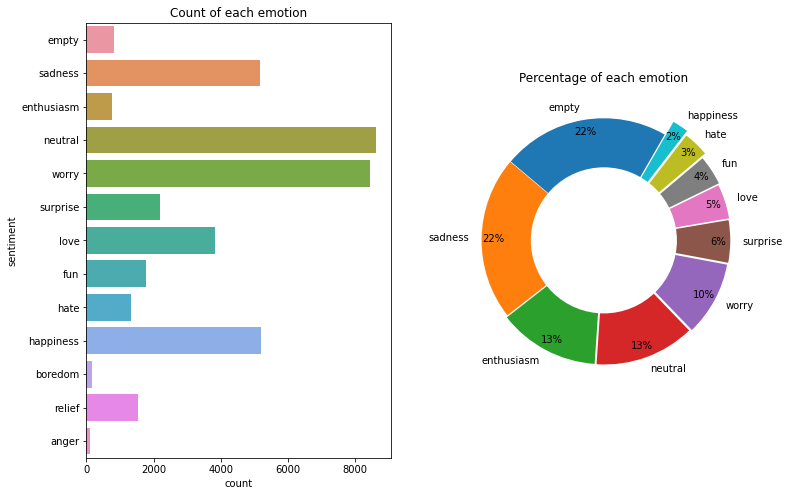

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

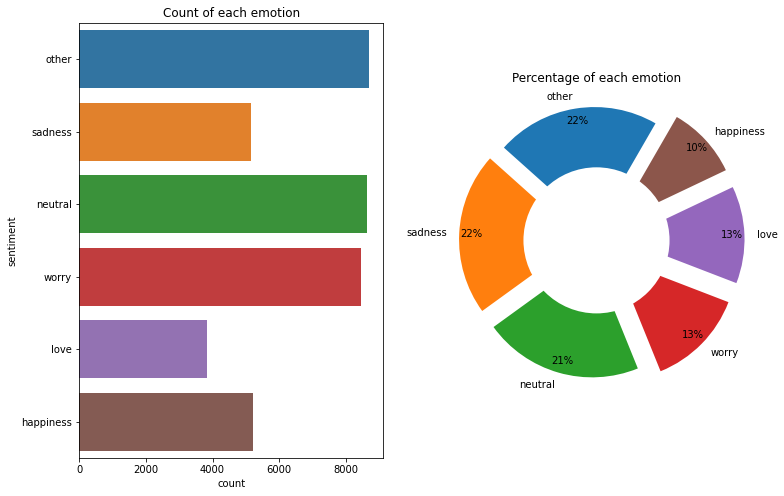

In [7]:
df['sentiment'] = df['sentiment'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other") 

col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [8]:
# clearing twitter specific scrubs and tokenizing

In [16]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.MENTION)

for i in range(len(df['content'])):
  df['content'][i] = p.clean(df['content'][i])
  df['content'][i] = p.tokenize(df['content'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
print(df['content'])

0        i know i was listenin to bad habit earlier and...
1        Layin n bed with a headache ughhhh...waitin on...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        We want to trade with someone who has Houston ...
                               ...                        
39995                                                     
39996                        Happy Mothers Day All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...
39999    bullet train from tokyo the gf and i have been...
Name: content, Length: 40000, dtype: object


In [11]:
# train test split

In [18]:
from sklearn.model_selection import train_test_split

X, y = df['content'], df['sentiment']
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [19]:
print(X_train, y_train)

37755             If you wanna read something, I recommend
503      PGPM student from where? I myself was a PGPM s...
37659    This is true... Clean clothes is a VERY good t...
36148                        love new shoes thanks wine lo
2737     I walk to &amp; from work...about 25 mins...th...
                               ...                        
2885     sorry love had no left overs but come through ...
20325    lol. sounds like don't call me babe have done ...
7242        Missed the hello kitty not enough time oh well
5166     I am soooo disappointed that that is what he l...
12760                 its Gloomy in LA no sun but its nice
Name: content, Length: 28000, dtype: object 37755    neutral
503      neutral
37659       love
36148       love
2737       worry
          ...   
2885     neutral
20325      worry
7242     neutral
5166     sadness
12760    sadness
Name: sentiment, Length: 28000, dtype: object


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(2, 28000)))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# With custom backward layer
model = Sequential()
forward_layer = LSTM(10, return_sequences=True)
backward_layer = LSTM(10, activation='relu', return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer, input_shape=(5, 10)))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [14]:
print(X_train)

37755             If you wanna read something, I recommend
503      PGPM student from where? I myself was a PGPM s...
37659    This is true... Clean clothes is a VERY good t...
36148                        love new shoes thanks wine lo
2737     I walk to &amp; from work...about 25 mins...th...
                               ...                        
2885     sorry love had no left overs but come through ...
20325    lol. sounds like don't call me babe have done ...
7242        Missed the hello kitty not enough time oh well
5166     I am soooo disappointed that that is what he l...
12760                 its Gloomy in LA no sun but its nice
Name: content, Length: 28000, dtype: object


In [21]:
model.fit(X_train, y_train, batch_size=64, epochs=20) # validation_split=0.1);

Epoch 1/20


ValueError: ignored